In [20]:
%matplotlib inline
import warnings
import category_encoders as ce
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix, 
                             roc_auc_score, roc_curve)
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.exceptions import DataConversionWarning
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [ ]:
# Load data
X_train = pd.read_csv('datasets/bank-marketing/train_features.csv').drop(columns='id')
X_test  = pd.read_csv('datasets/bank-marketing/test_features.csv').drop(columns='id')
y_train = pd.read_csv('datasets/bank-marketing/train_labels.csv')['y']
# y_test withheld
sample_submission = pd.read_csv('datasets/bank-marketing/sample_submission.csv')

In [21]:
# Make pipeline
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    StandardScaler(), 
    LogisticRegression(solver='lbfgs', max_iter=1000)
)

In [22]:
X_train.shape

(30891, 19)

In [12]:
y_pred_proba = cross_val_predict(pipeline, X_train, y_train, cv=3, 
                                 n_jobs=-1, method='predict_proba')[:, 1]

threshold = 0.5
y_pred = y_pred_proba >= threshold

In [18]:
confusion_matrix(y_train, y_pred)

array([[26990,   421],
       [ 2690,   790]], dtype=int64)

In [14]:
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       0.91      0.98      0.95     27411
          1       0.65      0.23      0.34      3480

avg / total       0.88      0.90      0.88     30891



Area under the Receiver Operating Characteristic curve: 0.7868823584541318


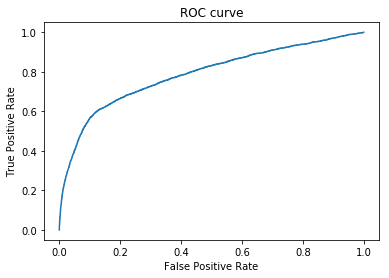

In [17]:
fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_train, y_pred_proba))